In [217]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Visualization
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


In [161]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

In [162]:
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

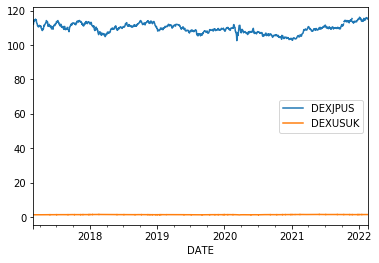

In [163]:
ccy_data.plot();

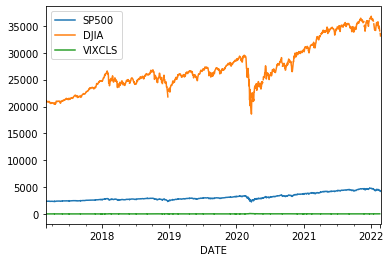

In [164]:
idx_data.plot();

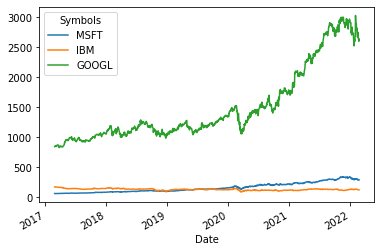

In [165]:
stk_data['Open'].plot();

In [166]:
return_period = 5

In [167]:
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)

In [168]:
Y.name = 'MSFT_pred'

In [169]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()

X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, 
                                                                            return_period * 3, 
                                                                            return_period * 6, 
                                                                            return_period * 12]
          ], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1,X2,X3,X4], axis=1)

dataset = pd.concat([X,Y], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

#### Exploratory data analysis

##### 3.1 Descriptive analysis

In [170]:
pd.set_option('precision', 3)
dataset.describe()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_pred
count,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,3.519e-04,0.004,-8.697e-06,-4.748e-04,0.002,0.001,0.009,0.006,0.018,0.039,0.082,0.006
std,3.758e-02,0.037,8.939e-03,1.220e-02,0.026,0.028,0.177,0.033,0.050,0.064,0.072,0.034
min,-1.683e-01,-0.159,-3.293e-02,-5.492e-02,-0.162,-0.190,-0.559,-0.145,-0.165,-0.288,-0.139,-0.153
25%,-1.718e-02,-0.013,-5.348e-03,-6.905e-03,-0.007,-0.008,-0.087,-0.013,-0.008,0.005,0.044,-0.013
50%,2.102e-03,0.007,4.806e-04,-1.442e-03,0.004,0.004,-0.002,0.008,0.017,0.041,0.085,0.007
75%,1.734e-02,0.023,5.467e-03,6.167e-03,0.015,0.014,0.089,0.024,0.052,0.076,0.130,0.026
max,1.304e-01,0.134,3.800e-02,5.121e-02,0.098,0.121,0.910,0.100,0.186,0.285,0.283,0.100


In [171]:
dataset.head()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_pred
2017-05-23,-0.011,0.006,-0.014,0.006,-9.377e-04,-1.996e-03,0.007,-0.011,-0.003,0.053,0.073,0.017
2017-05-31,0.004,0.017,-0.012,-0.002,3.077e-03,-1.794e-04,0.038,0.017,0.017,0.072,0.089,0.036
2017-06-08,-0.004,0.016,-0.010,0.003,1.534e-03,1.812e-03,0.027,0.026,0.064,0.065,0.116,-0.029
2017-06-15,0.014,-0.045,0.005,-0.013,-5.466e-04,8.339e-03,0.070,-0.029,0.016,0.018,0.091,0.005
2017-06-22,0.001,0.017,0.006,-0.009,8.383e-04,1.749e-03,-0.039,0.005,0.002,0.019,0.079,-0.026


In [172]:
dataset.dtypes

IBM          float64
GOOGL        float64
DEXJPUS      float64
DEXUSUK      float64
SP500        float64
DJIA         float64
VIXCLS       float64
MSFT_DT      float64
MSFT_3DT     float64
MSFT_6DT     float64
MSFT_12DT    float64
MSFT_pred    float64
dtype: object

##### 3.2 Data visualization

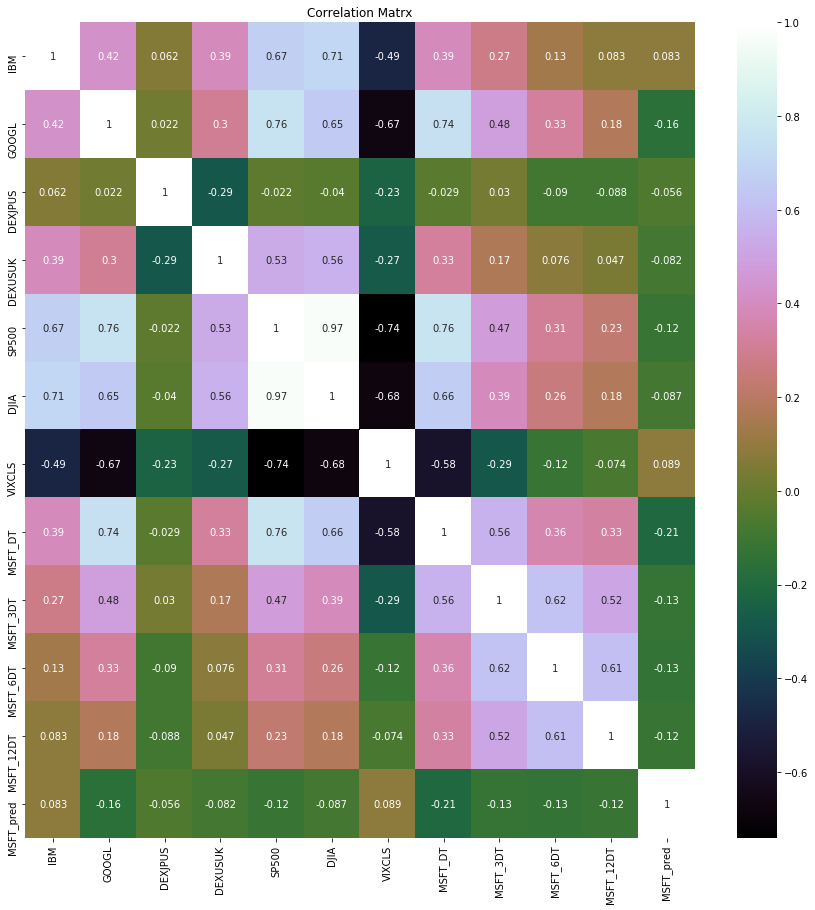

In [173]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrx')
sns.heatmap(correlation, vmax=1, annot=True, cmap='cubehelix')

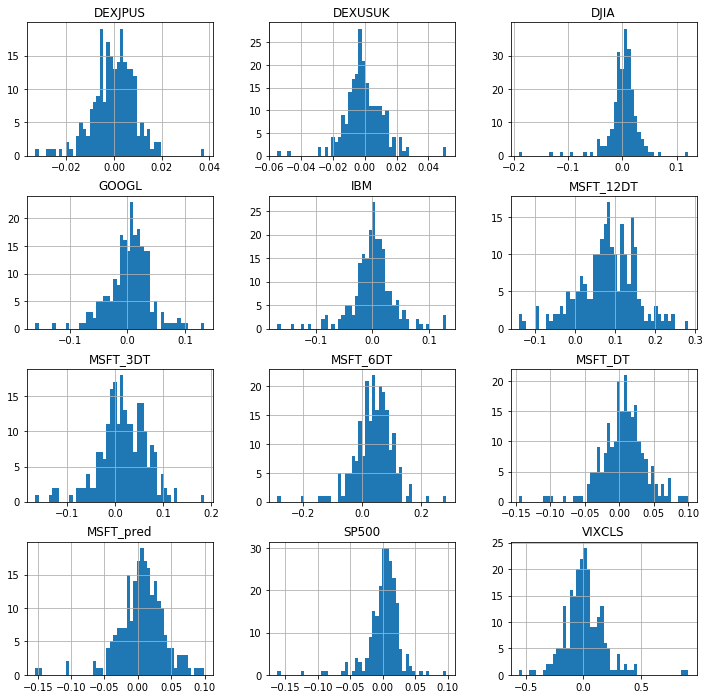

In [185]:
dataset.hist(bins=50, sharex=False, sharey=False,figsize=(12,12));

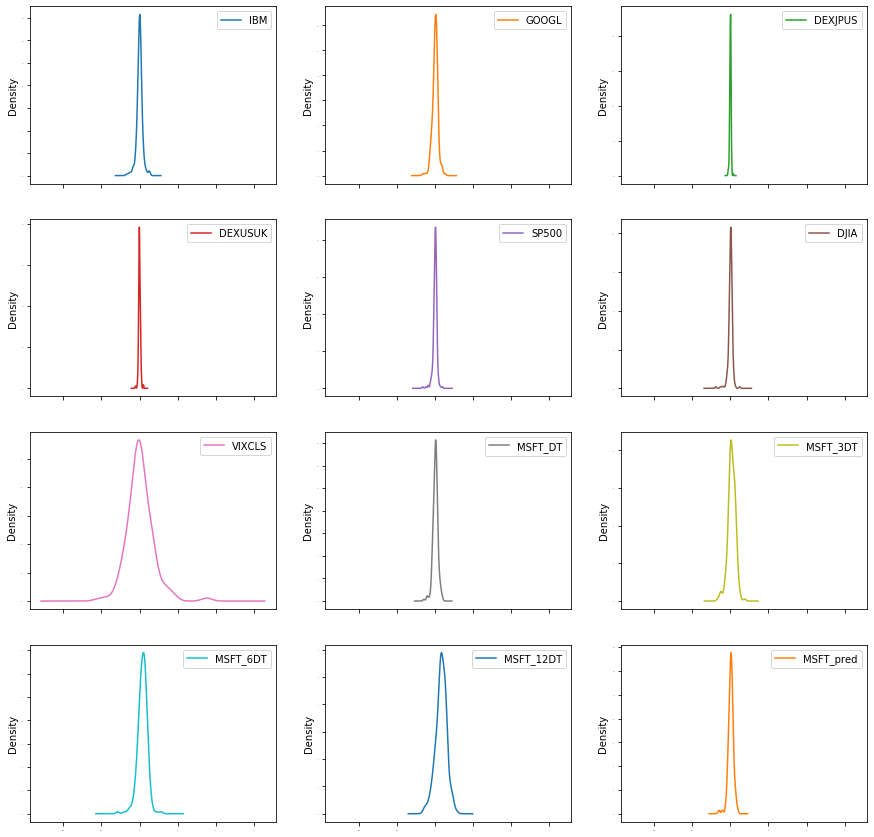

In [198]:
dataset.plot(kind='density', subplots=True, layout=(4,3), legend=True, fontsize=1, sharex=True, figsize=(15,15));

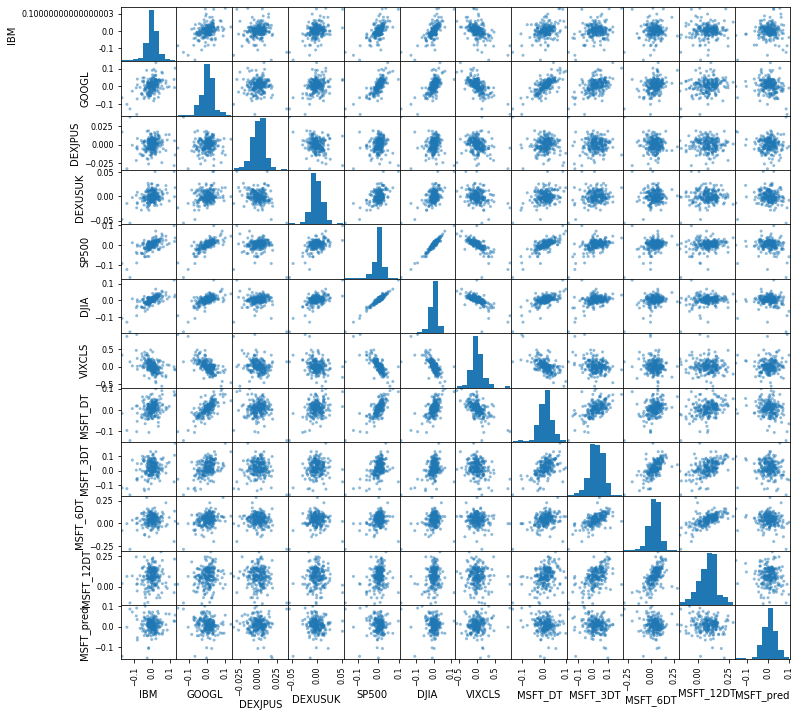

In [205]:
scatter_matrix(dataset, figsize=(12,12));

##### 3.3 Time Series Analysis

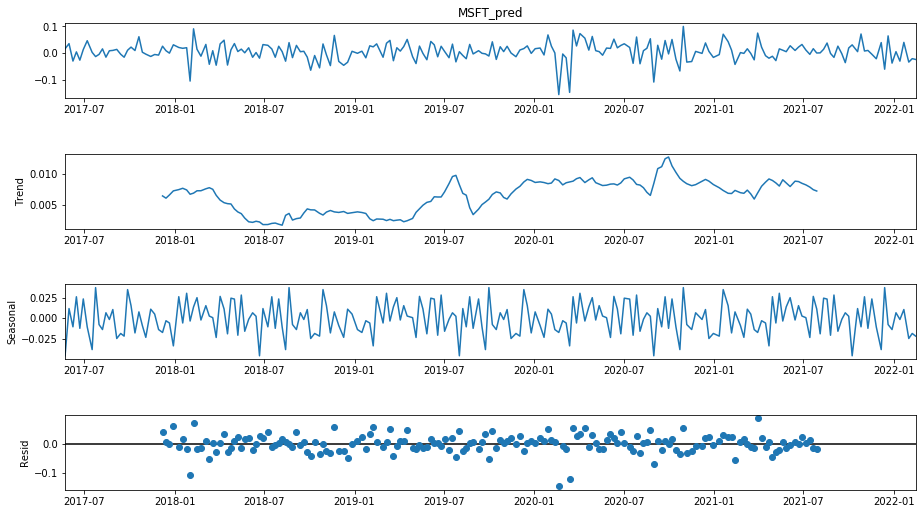

In [216]:
res = sm.tsa.seasonal_decompose(Y, period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

#### 4. Data Preparation
###### 4.2. Feature Selection

In [225]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.nlargest(10, 'Score')

,Specs,Score
7,MSFT_DT,9.973
1,GOOGL,5.652
9,MSFT_6DT,3.899
8,MSFT_3DT,3.612
10,MSFT_12DT,3.229
4,SP500,3.213
6,VIXCLS,1.783
5,DJIA,1.689
0,IBM,1.555
3,DEXUSUK,1.508


In [224]:
featureScores

,Specs,Score
0,IBM,1.555
1,GOOGL,5.652
2,DEXJPUS,0.713
3,DEXUSUK,1.508
4,SP500,3.213
5,DJIA,1.689
6,VIXCLS,1.783
7,MSFT_DT,9.973
8,MSFT_3DT,3.612
9,MSFT_6DT,3.899
